# Introduction

The miniSASP module is probably one of the more confuse modules and needs to be reorganized. Its goal is to read and process miniSASP data. This includes the convertion to optical depth and aerosol optical depth (correction for the airmass factor and rayleigh scattering).
There is also a function to simulate the sky brightness (as seen by the miniSASP) from a aerosol sizedistribution. This data has not been well tested though.

# Imports

In [2]:
import atmPy.aerosols.instruments.miniSASP as miniSASP
from atmPy.tools import plt_tools
# from atmPy.instruments.piccolo import piccolo

In [3]:
reload(miniSASP.miniSASP)
reload(miniSASP)

<module 'atmPy.aerosols.instruments.miniSASP' from '/mnt/telg/prog/atm-py/atmPy/aerosols/instruments/miniSASP/__init__.py'>

# Load a raw miniSASP file

In [4]:
# %%debug -b /mnt/telg/prog/atm-py/atmPy/aerosols/instruments/miniSASP/miniSASP.py:879
ms_raw = miniSASP.read_csv('./data/miniSASP_raw.txt', '2015')

<AxesSubplot:xlabel='Time_UTC'>

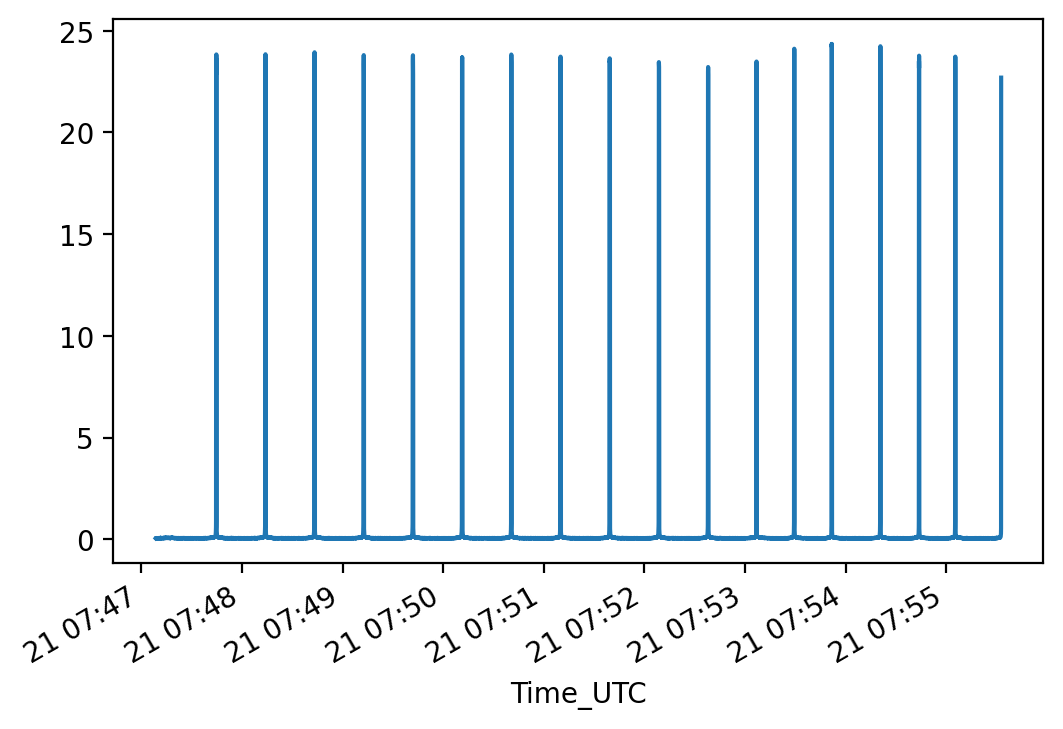

In [5]:
ms_raw.data.PhotoAsh.plot()

# Get sun_intensities

here we get the maxima of the peaks from above

In [6]:
sun_intensities = ms_raw.find_peaks()

(15.0, 30.0)

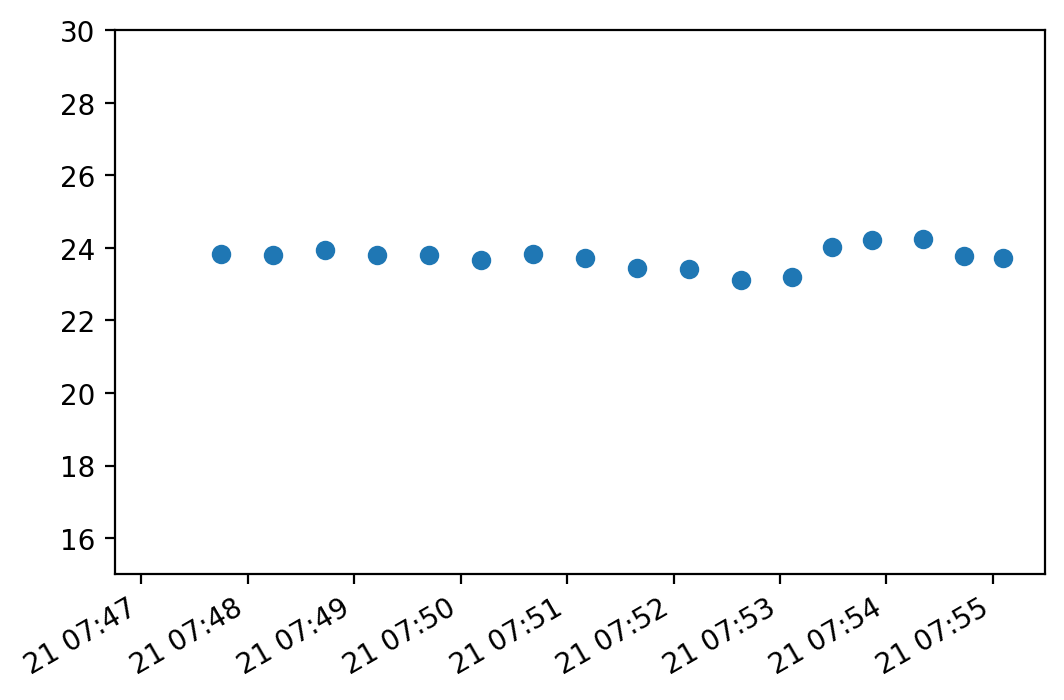

In [7]:
ax = sun_intensities.data['550.4'].plot(marker = 'o', linestyle = '')
ax.set_ylim((15,30))

In [8]:
sun_intensities.data

,550.4,550.4 max,460.3,460.3 max,671.2,671.2 max,860.7,860.7 max
2015-04-21 07:47:08.838402000,0.052222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-21 07:47:11.527278000,NaN,NaN,83.064222,NaN,NaN,NaN,NaN,NaN
2015-04-21 07:47:14.852241600,NaN,NaN,NaN,NaN,0.173333,NaN,NaN,NaN
2015-04-21 07:47:44.702030400,23.836667,NaN,17.740000,NaN,45.860000,NaN,58.997778,NaN
2015-04-21 07:48:13.973374800,23.808889,NaN,17.298889,NaN,45.262222,NaN,58.961111,NaN
2015-04-21 07:48:43.274635200,23.943333,NaN,17.627778,NaN,45.443333,NaN,58.957778,NaN
2015-04-21 07:49:12.585856800,NaN,NaN,17.655556,NaN,NaN,NaN,58.917778,NaN
2015-04-21 07:49:12.615830400,23.803333,NaN,NaN,NaN,43.740000,NaN,NaN,NaN
2015-04-21 07:49:41.935018800,NaN,NaN,17.550000,NaN,NaN,NaN,58.640000,NaN
2015-04-21 07:49:41.965010400,23.795556,NaN,NaN,NaN,43.896667,NaN,NaN,NaN


In [9]:
sun_intensities.data.shape

(26, 8)

# Plot as a function of Altitude

sun_intensities does not have Altitude information, which we can get from telemetry data, here from the piccolo auto pilot.

In [10]:
import atmPy.plattforms.piccolo.piccolo as atmpic

In [11]:
picco = atmpic.read_csv('./data/piccolo.log')

In [12]:
timeseries = sun_intensities.merge(picco)

In [15]:

sun_intensities = sun_intensities.add_sun_elevetion(picco)

/mnt/telg/prog/atm-py/atmPy/radiation/solar.py:173: UserWarning: Discarding nonzero nanoseconds in conversion.
  out = getpos(lat, lon, date, elevation)


/mnt/telg/programs/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/lines.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val
/mnt/telg/programs/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/lines.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val
/mnt/telg/programs/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/lines.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val
/mnt/telg/programs/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/lines.py:1157: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val


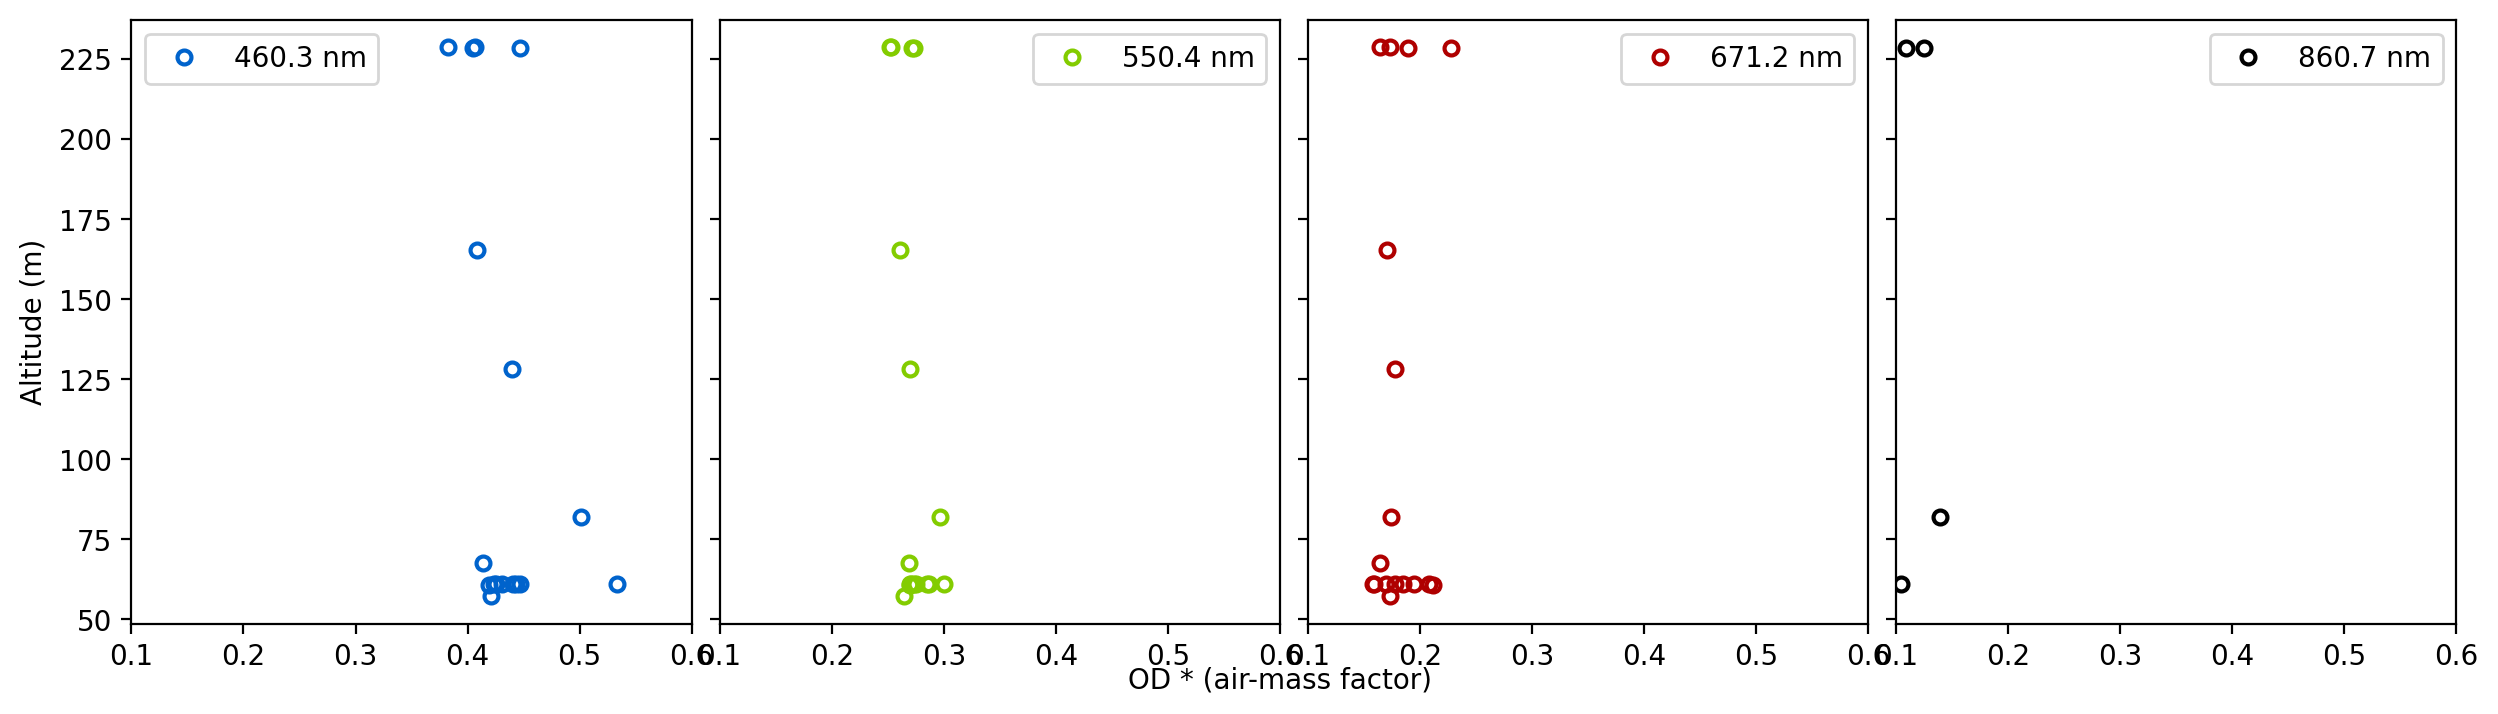

In [16]:
axs = sun_intensities.plot(offset=[3.29,3.44,3.99,4.16],
                    airmassfct=True,
                    move_max = False)
for ax in axs:
    ax.set_xlim((0.1,0.6))

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/lines.py:1083: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


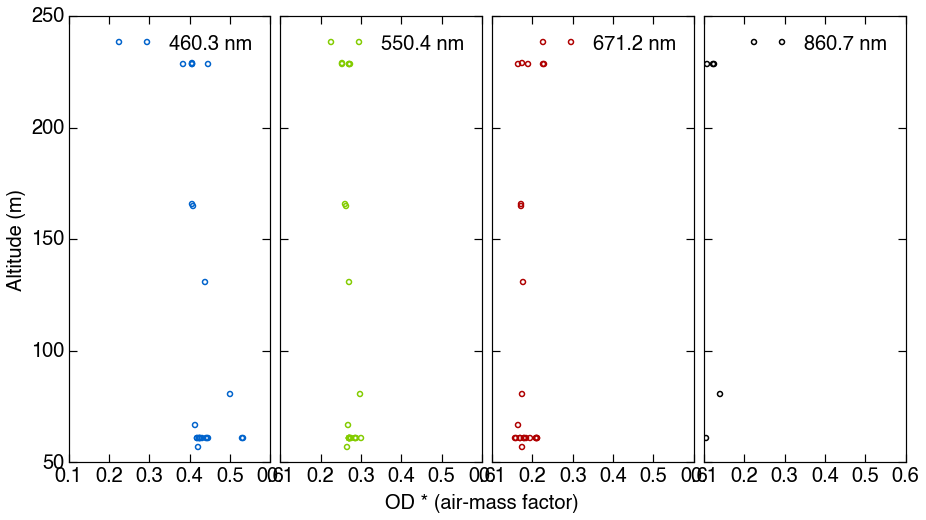

In [56]:
axs = sun_intensities.plot(offset=[3.29,3.44,3.99,4.16],
                    airmassfct=True,
                    move_max = False)
for ax in axs:
    ax.set_xlim((0.1,0.6))

In [18]:
type(sun_intensities)

atmPy.aerosols.instruments.miniSASP.miniSASP.Sun_Intensities_TS

In [ ]:
sun_intensities.